In [11]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("banking_dataset.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Customer ID', 'Name', 'Surname', 'Gender', 'Age',
       'Region', 'Job Classification', 'Date Joined', 'Balance', 'loan',
       'score', 'loan_def', 'loan_eligibility'],
      dtype='object')

In [4]:
df.dtypes


Unnamed: 0              int64
Customer ID             int64
Name                   object
Surname                object
Gender                 object
Age                     int64
Region                 object
Job Classification     object
Date Joined            object
Balance               float64
loan                  float64
score                 float64
loan_def                int64
loan_eligibility      float64
dtype: object

# Checking for NULL Values

In [9]:
(df.isnull().sum().sort_values(ascending=False))

Unnamed: 0            0
Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
loan                  0
score                 0
loan_def              0
loan_eligibility      0
dtype: int64

# seperting data into numerical and categorical

In [12]:
df_num=df.select_dtypes(include=[np.number])

In [13]:
df_cat=df.select_dtypes(include=['object']) 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# outlier processing of numerical data

In [16]:
df_num.describe()

,Unnamed: 0,Customer ID,Age,Balance,loan,score,loan_def,loan_eligibility
count,4014.000000,4.014000e+03,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,2006.500000,1.696831e+08,38.611111,39766.448274,5557.883159,501.068012,0.462133,2.100837e+05
std,1158.886319,8.865374e+07,9.819121,29859.489192,2582.640099,113.666117,0.498626,3.677718e+05
min,0.000000,1.000000e+08,15.000000,11.520000,1000.000000,300.000000,0.000000,0.000000e+00
25%,1003.250000,1.000020e+08,31.000000,16115.367500,3366.000000,404.000000,0.000000,0.000000e+00
50%,2006.500000,1.000038e+08,37.000000,33567.330000,5566.500000,502.000000,0.000000,3.040905e+04
75%,3009.750000,2.000031e+08,45.000000,57533.930000,7768.750000,596.750000,1.000000,2.787510e+05
max,4013.000000,4.000038e+08,64.000000,183467.700000,9996.000000,700.000000,1.000000,3.633620e+06


<Axes: >

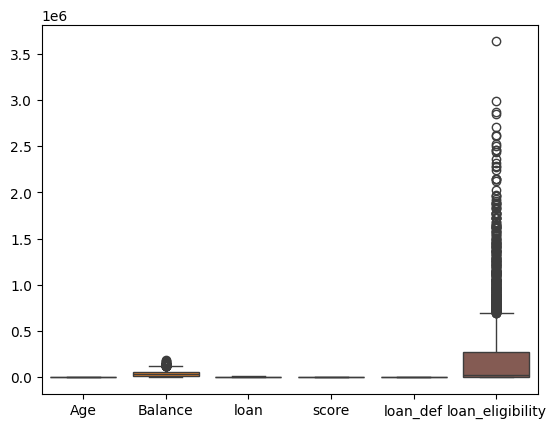

In [18]:
sns.boxplot(df_num[['Age','Balance','loan','score','loan_def','loan_eligibility']])

In [19]:
df_num=df_num[['Age','Balance','loan','score','loan_def','loan_eligibility']]

In [20]:
df_num.describe()

,Age,Balance,loan,score,loan_def,loan_eligibility
count,4014.000000,4014.000000,4014.000000,4014.000000,4014.000000,4.014000e+03
mean,38.611111,39766.448274,5557.883159,501.068012,0.462133,2.100837e+05
std,9.819121,29859.489192,2582.640099,113.666117,0.498626,3.677718e+05
min,15.000000,11.520000,1000.000000,300.000000,0.000000,0.000000e+00
25%,31.000000,16115.367500,3366.000000,404.000000,0.000000,0.000000e+00
50%,37.000000,33567.330000,5566.500000,502.000000,0.000000,3.040905e+04
75%,45.000000,57533.930000,7768.750000,596.750000,1.000000,2.787510e+05
max,64.000000,183467.700000,9996.000000,700.000000,1.000000,3.633620e+06


In [21]:
q1=0
q3=2.787510e+05
llimt=0
ulimit=2.787510e+05*1.15

In [23]:
df_num_1=df_num[(df_num["loan_eligibility"]>llimt) & (df_num["loan_eligibility"]<ulimit)]

<Axes: >

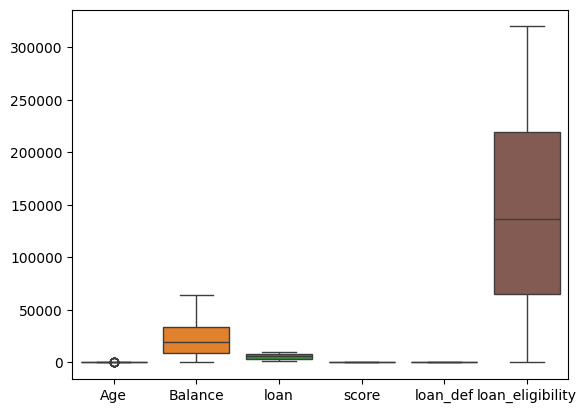

In [24]:
sns.boxplot(df_num_1)

# Scaling 

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mms=MinMaxScaler()

In [35]:
df_num_s=mms.transform(df_num_1)

# encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [32]:
df_cat1=df_cat.loc[df_num_1.index.values,]

In [33]:
df_cat_e=df_cat1.apply(le.fit_transform)

In [37]:
df_cat_e

,Name,Surname,Gender,Region,Job Classification,Date Joined
4,41,109,0,0,0,72
6,46,133,0,0,0,92
9,44,100,1,0,2,103
10,44,72,1,0,2,103
15,119,94,1,0,2,122
...,...,...,...,...,...,...
3988,155,10,1,0,2,257
3991,12,27,1,0,2,257
3992,82,132,1,0,2,257
4004,83,47,1,0,2,266


In [40]:
pd.DataFrame(df_num_s)

,0,1,2,3,4,5
0,0.487805,0.556861,0.176379,0.263819,0.0,0.556861
1,0.390244,0.670021,0.182829,0.419598,0.0,0.670021
2,0.585366,0.170379,0.369996,0.816583,0.0,0.682055
3,0.536585,0.619818,0.601423,0.404523,0.0,0.619818
4,0.585366,0.032906,0.471641,0.500000,0.0,0.032906
...,...,...,...,...,...,...
1266,0.195122,0.577562,0.477313,0.419598,0.0,0.577562
1267,0.000000,0.365549,0.440836,0.419598,0.0,0.365549
1268,0.268293,0.471182,0.186165,0.180905,0.0,0.471182
1269,0.658537,0.131671,0.877113,0.703518,0.0,0.263522


In [43]:
df_cat_e.reset_index(inplace = True)

In [44]:
df_final=pd.concat([pd.DataFrame(df_num_s),df_cat_e],axis=1)

In [45]:
df_final

,0,1,2,3,4,5,index,Name,Surname,Gender,Region,Job Classification,Date Joined
0,0.487805,0.556861,0.176379,0.263819,0.0,0.556861,4,41,109,0,0,0,72
1,0.390244,0.670021,0.182829,0.419598,0.0,0.670021,6,46,133,0,0,0,92
2,0.585366,0.170379,0.369996,0.816583,0.0,0.682055,9,44,100,1,0,2,103
3,0.536585,0.619818,0.601423,0.404523,0.0,0.619818,10,44,72,1,0,2,103
4,0.585366,0.032906,0.471641,0.500000,0.0,0.032906,15,119,94,1,0,2,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,0.195122,0.577562,0.477313,0.419598,0.0,0.577562,3988,155,10,1,0,2,257
1267,0.000000,0.365549,0.440836,0.419598,0.0,0.365549,3991,12,27,1,0,2,257
1268,0.268293,0.471182,0.186165,0.180905,0.0,0.471182,3992,82,132,1,0,2,257
1269,0.658537,0.131671,0.877113,0.703518,0.0,0.263522,4004,83,47,1,0,2,266


In [47]:
df_final.drop(['index','Name','Surname'],axis=1,inplace=True)

In [49]:
df_final.drop(['Date Joined'],axis=1,inplace=True)

In [50]:
df_final.head()

,0,1,2,3,4,5,Gender,Region,Job Classification
0,0.487805,0.556861,0.176379,0.263819,0.0,0.556861,0,0,0
1,0.390244,0.670021,0.182829,0.419598,0.0,0.670021,0,0,0
2,0.585366,0.170379,0.369996,0.816583,0.0,0.682055,1,0,2
3,0.536585,0.619818,0.601423,0.404523,0.0,0.619818,1,0,2
4,0.585366,0.032906,0.471641,0.500000,0.0,0.032906,1,0,2


In [51]:
df_final.rename(columns={0:'Age',1:'Balance',2:'loan',3:'score',4:'loan_def',5:'loan_eligibility'},inplace=True)

In [52]:
df_final.head()

,Age,Balance,loan,score,loan_def,loan_eligibility,Gender,Region,Job Classification
0,0.487805,0.556861,0.176379,0.263819,0.0,0.556861,0,0,0
1,0.390244,0.670021,0.182829,0.419598,0.0,0.670021,0,0,0
2,0.585366,0.170379,0.369996,0.816583,0.0,0.682055,1,0,2
3,0.536585,0.619818,0.601423,0.404523,0.0,0.619818,1,0,2
4,0.585366,0.032906,0.471641,0.500000,0.0,0.032906,1,0,2


In [54]:
X=df_final.drop(['loan_eligibility'],axis=1)
y=df_final['loan_eligibility']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [57]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///Users/prompt/Documents/MLFLOW9/f2/'

In [59]:
import mlflow

In [60]:
mlflow.set_experiment("wine-quality")

2024/05/13 14:59:58 INFO mlflow.tracking.fluent: Experiment with name 'wine-quality' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/prompt/Documents/MLFLOW9/f2/128734299163511958', creation_time=1715592598621, experiment_id='128734299163511958', last_update_time=1715592598621, lifecycle_stage='active', name='wine-quality', tags={}>

In [72]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_training_score", testing_score_rf)
    mlflow.log_metric("gbm_training_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

    
    

C:\Users\prompt\anaconda3\envs\feb_20_2024\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\prompt\anaconda3\envs\feb_20_2024\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [74]:
import requests
import json

#data = {"columns": iris.feature_names, "data": [[6.1, 2.8, 4.7, 1.2]]}
data = {'dataframe_records': X_test.values.tolist()}
headers = {"Content-Type": "application/json"}

response = requests.post("http://localhost:8002/invocations", data=json.dumps(data), headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0.45070479460447943, 0.19503411704267148, 0.1003282542349103, 0.7114391843349552, 0.7151970602232648, 0.07067271735675018, 0.3620525896048527, 0.22430381591825138, 0.2862500012419373, 0.06682449231848328, 0.1730708749515258, 0.3502157487557064, 0.12233773955911666, 0.08223297124177484, 0.7502205889494492, 0.9103033853949349, 0.313964206988537, 0.6635543941844271, 0.65270363733015, 0.9271173311506462, 0.031557516198950204, 0.2660592186988336, 0.5676655393026622, 0.6466926602894668, 0.3375340756372953, 0.34202569776902925, 0.5608507822159736, 0.2614071342332082, 0.9308635662138985, 0.18442473685344127, 0.9423494398756966, 0.03065523123607091, 0.12360482866076195, 0.5145331613758929, 0.9315725838966243, 0.8630714082242734, 0.7888448126757523, 0.41568095338399597, 0.15295206605718223, 0.40162312675683254, 0.12888395014845888, 0.48950483155279945, 0.49156714288548675, 0.5385870047676302, 0.2826915254257707, 0.615922118947962, 0.4814364903665451, 0.27768420423250184, 0.90666

In [75]:
predictions["predictions"]

[0.45070479460447943,
 0.19503411704267148,
 0.1003282542349103,
 0.7114391843349552,
 0.7151970602232648,
 0.07067271735675018,
 0.3620525896048527,
 0.22430381591825138,
 0.2862500012419373,
 0.06682449231848328,
 0.1730708749515258,
 0.3502157487557064,
 0.12233773955911666,
 0.08223297124177484,
 0.7502205889494492,
 0.9103033853949349,
 0.313964206988537,
 0.6635543941844271,
 0.65270363733015,
 0.9271173311506462,
 0.031557516198950204,
 0.2660592186988336,
 0.5676655393026622,
 0.6466926602894668,
 0.3375340756372953,
 0.34202569776902925,
 0.5608507822159736,
 0.2614071342332082,
 0.9308635662138985,
 0.18442473685344127,
 0.9423494398756966,
 0.03065523123607091,
 0.12360482866076195,
 0.5145331613758929,
 0.9315725838966243,
 0.8630714082242734,
 0.7888448126757523,
 0.41568095338399597,
 0.15295206605718223,
 0.40162312675683254,
 0.12888395014845888,
 0.48950483155279945,
 0.49156714288548675,
 0.5385870047676302,
 0.2826915254257707,
 0.615922118947962,
 0.4814364903665451

In [85]:
X_test.head()

,Age,Balance,loan,score,loan_def,Gender,Region,Job Classification
479,0.536585,0.212578,0.523020,0.572864,0.0,0,0,0
570,0.609756,0.101814,0.427491,0.623116,0.0,1,0,2
873,0.487805,0.100027,0.530472,0.022613,0.0,1,0,2
227,0.390244,0.719375,0.943283,0.331658,0.0,0,0,1
195,0.390244,0.722591,0.129226,0.314070,0.0,1,0,1


In [95]:
x_pre=pd.concat([X_test[["Age","Balance","loan","score","loan_def"]].reset_index(),pd.DataFrame(predictions["predictions"]).reset_index()],axis=1)


In [97]:
x_pre.head()

,index,Age,Balance,loan,score,loan_def,index,0
0,479,0.536585,0.212578,0.523020,0.572864,0.0,0,0.450705
1,570,0.609756,0.101814,0.427491,0.623116,0.0,1,0.195034
2,873,0.487805,0.100027,0.530472,0.022613,0.0,2,0.100328
3,227,0.390244,0.719375,0.943283,0.331658,0.0,3,0.711439
4,195,0.390244,0.722591,0.129226,0.314070,0.0,4,0.715197


In [100]:
x_pre.drop(['index'],axis=1,inplace=True)

In [102]:
x_pred_results=pd.DataFrame(mms.inverse_transform(x_pre))

In [103]:
x_pred_results[5]

0      144239.370838
1       62449.579641
2       32152.899482
3      227649.058242
4      228851.213637
           ...      
377     13840.124073
378    142306.884616
379     63940.587151
380    200847.874900
381     10143.354541
Name: 5, Length: 382, dtype: float64

In [104]:
from numpy import savetxt

In [105]:
savetxt('predictions.csv', x_pred_results[5], delimiter=',')

In [106]:
mlflow.log_artifact("predictions.csv")